## Section 1. Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

## Load data

In [2]:
root = '../data'
results_A = f'{root}/results_A.csv'
results_B = f'{root}/results_B.csv'

In [3]:
def df_from_csv(csv_path):
    return pd.read_csv(
    csv_path,
    encoding='ISO-8859-1',
    delimiter=';',
    quotechar='"',
    engine='python'
)

dfs = list(map(df_from_csv, [results_A, results_B]))

common_columns = list(reduce(lambda x, y: set(x).intersection(y), (df.columns for df in dfs)))

data = reduce(lambda left, right: pd.merge(left, right, on=common_columns, how='outer'), dfs)



In [4]:
data

,Id,Start time,Completion time,Email,Name,Total points,Quiz feedback,Grade posted time,How did you engage with the content of the paper?,Points - How did you engage with the content of the paper?,...,Feedback - What did the laboratory experiment of the Rock-Paper-Scissors game demonstrate regarding Evolutionary Dynamics (ED)?,"According to the study, what happens to aggregate behavior when the Nash Equilibrium (NE) is stable?","Points - According to the study, what happens to aggregate behavior when the Nash Equilibrium (NE) is stable?","Feedback - According to the study, what happens to aggregate behavior when the Nash Equilibrium (NE) is stable?",What additional prediction does Evolutionary Dynamics (ED) make beyond Nash Equilibrium (NE)?,Points - What additional prediction does Evolutionary Dynamics (ED) make beyond Nash Equilibrium (NE)?,Feedback - What additional prediction does Evolutionary Dynamics (ED) make beyond Nash Equilibrium (NE)?,Which type of games typically have an unstable Nash Equilibrium (NE) according to the literature?,Points - Which type of games typically have an unstable Nash Equilibrium (NE) according to the literature?,Feedback - Which type of games typically have an unstable Nash Equilibrium (NE) according to the literature?
0,2,15.11.2024 15:11,15.11.2024 15:24,test-2@ut.ee,test-2,7,NaN,NaN,Listening (NotebookLM),0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,15.11.2024 15:01,15.11.2024 15:11,test-1@ut.ee,test-1,4,NaN,NaN,Reading,0,...,NaN,ED predictions fail,0.0,NaN,Not mentioned,0.0,NaN,Not mentioned,0.0,NaN
2,1,14.11.2024 20:35,14.11.2024 20:58,test-1@ut.ee,test-1,5,NaN,NaN,Listening (NotebookLM),0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,14.11.2024 22:12,14.11.2024 22:34,anonymous,NaN,10,NaN,NaN,Reading,0,...,NaN,Population frequencies diverge from NE,0.0,NaN,Time average of ED is predicted to differ from NE,1.0,NaN,Bertrand games,0.0,NaN


In [5]:
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
columns = list(data.columns)
columns

['Id',
 'Start time',
 'Completion time',
 'Email',
 'Name',
 'Total points',
 'Quiz feedback',
 'Grade posted time',
 'How did you engage with the content of the paper?',
 'Points - How did you engage with the content of the paper?',
 'Feedback - How did you engage with the content of the paper?',
 'What is the primary objective of the study conducted by Coppersmith et al.?',
 'Points - What is the primary objective of the study conducted by Coppersmith et al.?',
 'Feedback - What is the primary objective of the study conducted by Coppersmith et al.?',
 'Approximately how many suicide attempts occur each year according to the introduction of the paper?',
 'Points - Approximately how many suicide attempts occur each year according to the introduction of the paper?',
 'Feedback - Approximately how many suicide attempts occur each year according to the introduction of the paper?',
 'What are the two practical reasons mentioned that make assessing suicide risk difficult?',
 'Points - What

In [6]:
pd.set_option('display.max_columns', False)

## Section 1. Likert Analysis

In [7]:
groups = [
    'Clarity and Comprehension',
    'Quality of the questions',
    'Confidence and Understanding',
    'Overall Experience',
]

options = ['Strongly disagree', 'Disagree', 
           'Neutral', 'Agree', 'Strongly agree']

In [8]:
excluded_prefixes = ("Points -", "Feedback -")

likert_columns = [
    col for col in data.columns 
    if any(group in col for group in groups)
]

filtered_columns = [
    col for col in likert_columns if not col.startswith(excluded_prefixes)
]

filtered_columns

['Clarity and Comprehension.The paper was well-organized and easy to follow.',
 'Clarity and Comprehension.The results and their implications were presented in a comprehensible manner.',
 'Clarity and Comprehension.I fully understood the methodology used in the laboratory experiments.',
 'Clarity and Comprehension.The terminology used in the paper was appropriate and well-defined.',
 'Clarity and Comprehension.The paper effectively communicated its main findings.',
 'Quality of the questions.The questions were relevant to the content of the paper.',
 'Quality of the questions.The questions were clear and easy to understand.',
 'Quality of the questions.The difficulty level of the questions was appropriate.',
 'Quality of the questions.The terminology used in the paper was appropriate and well-defined.',
 'Quality of the questions.The questions effectively assessed my understanding of the paper.',
 'Confidence and Understanding\n.I felt confident in my understanding of the paper after r

In [9]:
groups = [column.split('.')[0] for column in filtered_columns]

groups = sorted(set(groups))

groups

['Clarity and Comprehension',
 'Confidence and Understanding\n',
 'Overall Experience\n',
 'Quality of the questions']

In [10]:
filtered_columns

['Clarity and Comprehension.The paper was well-organized and easy to follow.',
 'Clarity and Comprehension.The results and their implications were presented in a comprehensible manner.',
 'Clarity and Comprehension.I fully understood the methodology used in the laboratory experiments.',
 'Clarity and Comprehension.The terminology used in the paper was appropriate and well-defined.',
 'Clarity and Comprehension.The paper effectively communicated its main findings.',
 'Quality of the questions.The questions were relevant to the content of the paper.',
 'Quality of the questions.The questions were clear and easy to understand.',
 'Quality of the questions.The difficulty level of the questions was appropriate.',
 'Quality of the questions.The terminology used in the paper was appropriate and well-defined.',
 'Quality of the questions.The questions effectively assessed my understanding of the paper.',
 'Confidence and Understanding\n.I felt confident in my understanding of the paper after r

In [11]:
dynamic_groups_mapping = {
    group: [col for col in filtered_columns if group in col]
    for group in groups
}

dynamic_groups_mapping


{'Clarity and Comprehension': ['Clarity and Comprehension.The paper was well-organized and easy to follow.',
  'Clarity and Comprehension.The results and their implications were presented in a comprehensible manner.',
  'Clarity and Comprehension.I fully understood the methodology used in the laboratory experiments.',
  'Clarity and Comprehension.The terminology used in the paper was appropriate and well-defined.',
  'Clarity and Comprehension.The paper effectively communicated its main findings.'],
 'Confidence and Understanding\n': ['Confidence and Understanding\n.I felt confident in my understanding of the paper after reading it.',
  'Confidence and Understanding\n.I was able to accurately recall key points from the paper.',
  'Confidence and Understanding\n.The difficulty level of the questions was appropriate.',
  'Confidence and Understanding\n.The paper enhanced my knowledge of the subject matter.'],
 'Overall Experience\n': ['Overall Experience\n.The overall experience of readi

In [12]:
keys = list(dynamic_groups_mapping.keys())

In [13]:
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

likert_data_mapped = data.replace(likert_mapping)

/var/folders/wn/xdbqbp051v5f8djhzppy97f40000gn/T/ipykernel_10192/2173514487.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  likert_data_mapped = data.replace(likert_mapping)


## 

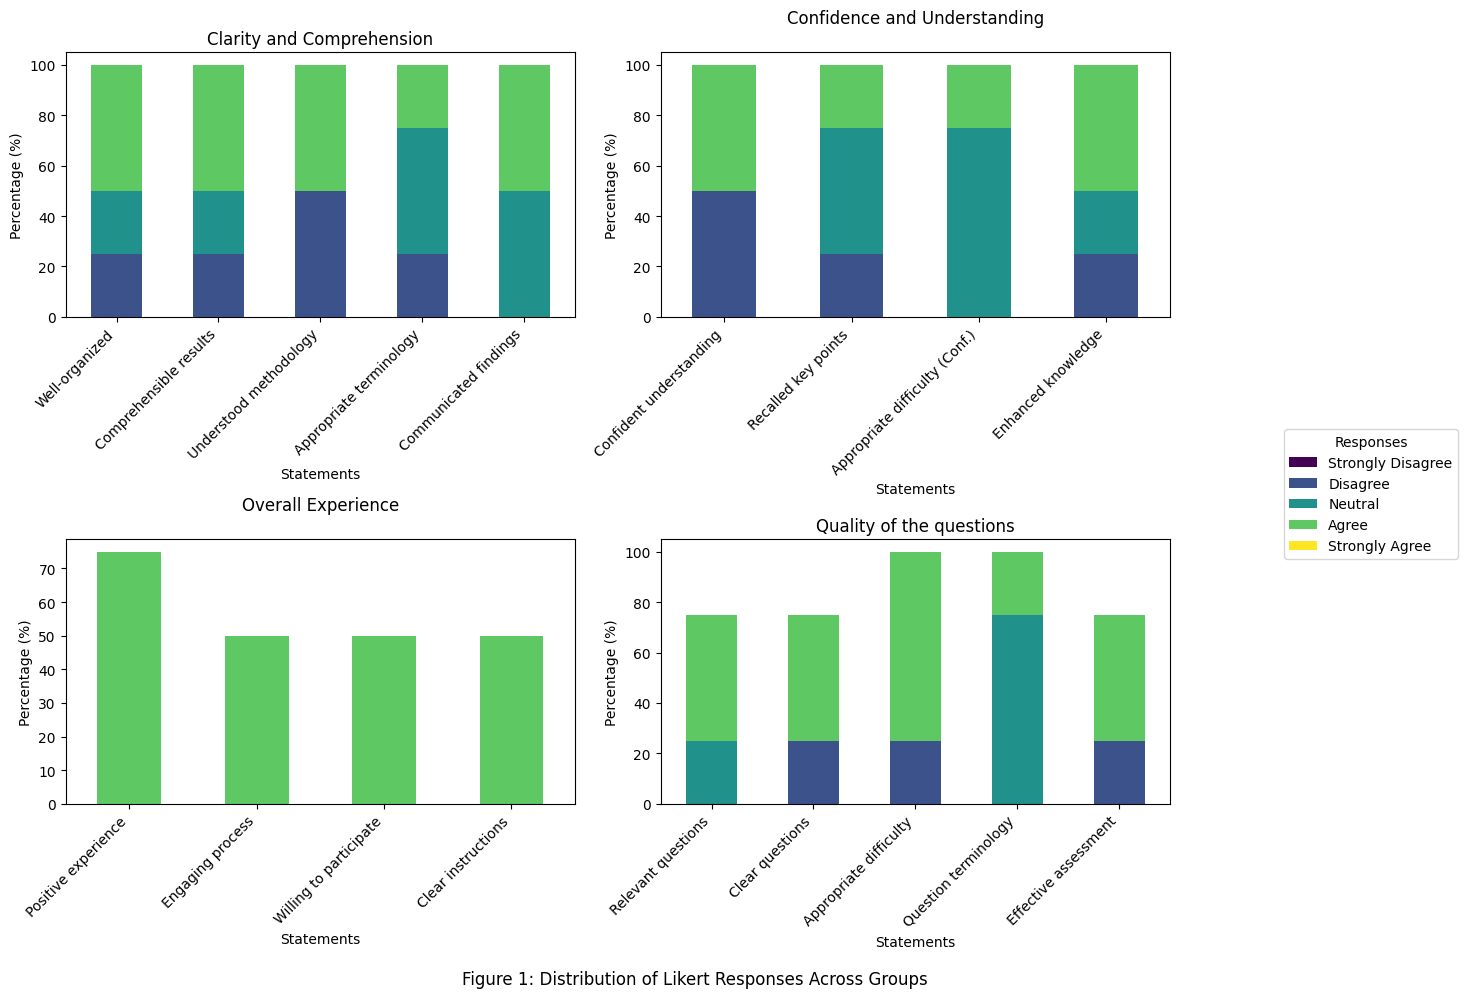

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# XXX: There can be overlapping of the text
# This is a temporary solution

x_label_aliases = {
    "Clarity and Comprehension.The paper was well-organized and easy to follow.": "Well-organized",
    "Clarity and Comprehension.The results and their implications were presented in a comprehensible manner.": "Comprehensible results",
    "Clarity and Comprehension.I fully understood the methodology used in the laboratory experiments.": "Understood methodology",
    "Clarity and Comprehension.The terminology used in the paper was appropriate and well-defined.": "Appropriate terminology",
    "Clarity and Comprehension.The paper effectively communicated its main findings.": "Communicated findings",
    "Quality of the questions.The questions were relevant to the content of the paper.": "Relevant questions",
    "Quality of the questions.The questions were clear and easy to understand.": "Clear questions",
    "Quality of the questions.The difficulty level of the questions was appropriate.": "Appropriate difficulty",
    "Quality of the questions.The terminology used in the paper was appropriate and well-defined.": "Question terminology",
    "Quality of the questions.The questions effectively assessed my understanding of the paper.": "Effective assessment",
    "Confidence and Understanding\n.I felt confident in my understanding of the paper after reading it.": "Confident understanding",
    "Confidence and Understanding\n.I was able to accurately recall key points from the paper.": "Recalled key points",
    "Confidence and Understanding\n.The difficulty level of the questions was appropriate.": "Appropriate difficulty (Conf.)",
    "Confidence and Understanding\n.The paper enhanced my knowledge of the subject matter.": "Enhanced knowledge",
    "Overall Experience\n.The overall experience of reading the paper and answering the questions was positive.": "Positive experience",
    "Overall Experience\n.I found the process engaging and worthwhile.": "Engaging process",
    "Overall Experience\n.I would be willing to participate in similar studies in the future.": "Willing to participate",
    "Overall Experience\n.The instructions provided were clear and easy to follow.": "Clear instructions"
}

likert_order = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]

for idx, group_key in enumerate(dynamic_groups_mapping.keys()):
    sample_data = data[dynamic_groups_mapping[group_key]]
    
    response_frequencies = pd.DataFrame({
        col: sample_data[col].value_counts(normalize=True) * 100 for col in sample_data.columns
    }).reindex(likert_order)
    
    response_frequencies.T.plot(
        kind="bar",
        stacked=True,
        colormap="viridis",
        ax=axes[idx],
        legend=False
    )
    axes[idx].set_title(group_key)
    axes[idx].set_xlabel("Statements")
    axes[idx].set_ylabel("Percentage (%)")
    
    axes[idx].set_xticklabels(
        [x_label_aliases.get(label, label) for label in sample_data.columns],
        rotation=45,
        ha='right'
    )

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Responses", bbox_to_anchor=(1.05, 0.5), loc='center right')
fig.text(0.5, 0.01, 'Figure 1: Distribution of Likert Responses Across Groups', ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 0.85, 1])
plt.show()